In [15]:
%matplotlib inline
from IPython.display import display, HTML
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import warnings
import numpy as np
import plotly.express as px

pd.set_option('max_colwidth',100)
warnings.filterwarnings('ignore')
plt.style.use('ggplot')

   ---------------------------------------- 15.7/15.7 MB 4.9 MB/s eta 0:00:00


In [3]:
aplicaciones_df = pd.read_csv("aplicaciones.csv")
aplicaciones_df

,Cliente,Edad,Score,Saldo
0,15647311,41,608,8380.786
1,15619304,42,502,15966.080
2,15737888,43,850,12551.082
3,15574012,44,645,11375.578
4,15656148,29,376,11504.674
...,...,...,...,...
6378,15769959,53,597,8838.121
6379,15569266,28,644,15506.041
6380,15569892,35,516,5736.961
6381,15682355,42,772,7507.531


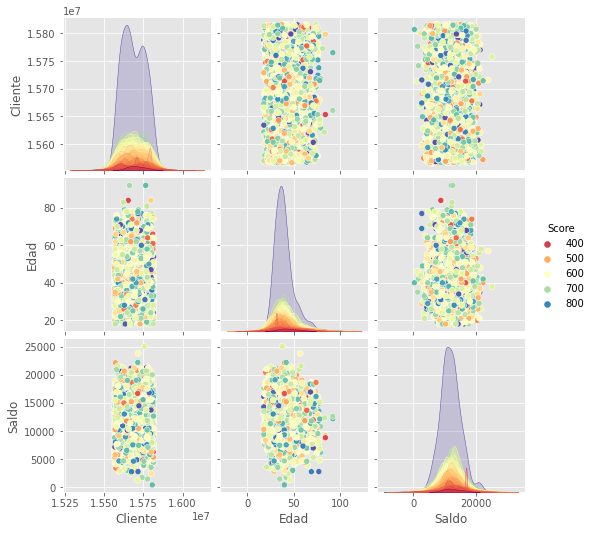

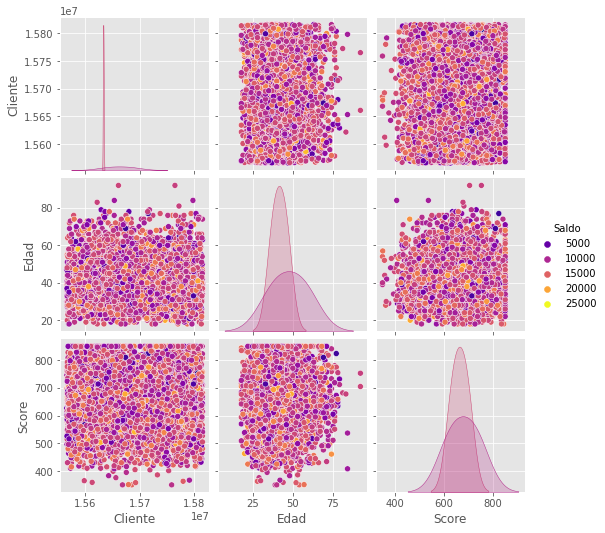

In [6]:
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('ggplot')

smp = sns.pairplot(aplicaciones_df,hue="Score",diag_kind='kde',palette="Spectral")
smp = sns.pairplot(aplicaciones_df,hue="Saldo",diag_kind='kde',palette="plasma")

Matriz de Covarianzas


,Cliente,Edad,Score,Saldo
Cliente,5.173800e+09,-4802.792437,88914.169960,-1.881076e+06
Edad,-4.802792e+03,109.750938,-9.623124,-4.042534e+02
Score,8.891417e+04,-9.623124,9396.318328,-1.383987e+03
Saldo,-1.881076e+06,-404.253438,-1383.986978,9.057124e+06


<AxesSubplot:>

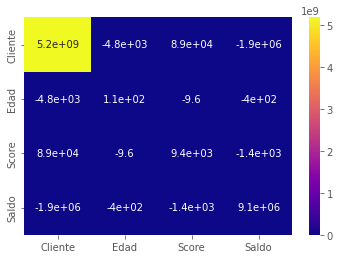

In [7]:
#Empecemos con las estadisticas descriptivas multivariadas 
features = ['Cliente','Edad','Score','Saldo']
print('Matriz de Covarianzas')
display(aplicaciones_df[features].cov())
sns.heatmap(aplicaciones_df[features].cov(),cmap="plasma", annot=True)

##### De la matriz de covarianzas podemos observar que fuera de las variables en la diagonal que van a estar realcionadas de forma mas alta, notamos que las variables cliente y score son las mas realcionadas, caso contrario con las demas variables en las que tenemos valores negativos lo cual nos dice que no estan relacionadas, ademas era de esperar que la variable cliente este mas relacionada con el score ya que es bien sabido que el score de cada persona depende unicamente de ella y la forma en que se maneje financieramente hablando.

Matriz de Correlaciones


,Cliente,Edad,Score,Saldo
Cliente,1.000000,-0.006374,0.012752,-0.008690
Edad,-0.006374,1.000000,-0.009476,-0.012822
Score,0.012752,-0.009476,1.000000,-0.004744
Saldo,-0.008690,-0.012822,-0.004744,1.000000


<AxesSubplot:>

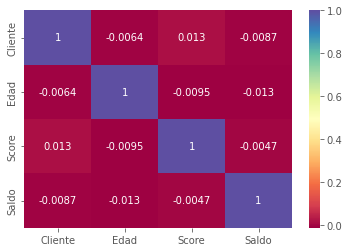

In [8]:
print("Matriz de Correlaciones")
display(aplicaciones_df[features].corr())
sns.heatmap(aplicaciones_df[features].corr(),cmap="Spectral", annot=True)

#### Ahora realizaremos algunos graficos para ver si tenemos algunos outiliers en nuestra base de datos

##### De forma analoga a la matriz de covarianzas en esta nueva grafica muestra como las variables Score y Cliente son las mas correlacionadas 

In [22]:
fig = px.violin(y = aplicaciones_df.Score, box = True)
fig.update_traces(fillcolor = 'green',   # Color de fondo
                  line_color = 'blue',   # Color de borde
                  marker_line_outliercolor = 'black', # Color de borde de los atípicos
                  box_fillcolor = 'red', # Color del box plot
                  opacity = 0.5) 
fig.show()

In [29]:
fig = px.violin(y = aplicaciones_df.Edad, box = True)
fig.update_traces(fillcolor = 'maroon',   # Color de fondo
                  line_color = 'blue',   # Color de borde
                  marker_line_outliercolor = 'black', # Color de borde de los atípicos
                  box_fillcolor = 'cadetblue', # Color del box plot
                  opacity = 0.5) 
fig.show()

In [27]:
fig = px.violin(y = aplicaciones_df.Saldo, box = True)
fig.update_traces(fillcolor = 'crimson',   # Color de fondo
                  line_color = 'blue',   # Color de borde
                  marker_line_outliercolor = 'black', # Color de borde de los atípicos
                  box_fillcolor = 'black', # Color del box plot
                  opacity = 0.5) 
fig.show()

#### De los graficos realizados podemos observar que las variables Score, Saldo Y Edad muestran tener algunos outliers, sin embargo al menos para el caso de la variable Edad estos datos observados fuera de los rangos no necesariamente estarian indicando que estos son outliers sino valores extremos, caso contrario a las otras 2 variable en las que si podrian ser outilers.

In [60]:
#Lo que sigue es estandarizar nuestros datos y aplicarles las transformacion de box cox
columns = ["Cliente","Edad","Score","Saldo"]
def getStdDataMatrix(aplicaciones_df,columns,keys):
    aplicaciones_df = aplicaciones_df.copy(deep=True)
    meanVector = aplicaciones_df[columns].mean().to_dict()
    stdVector = aplicaciones_df[columns].std().to_dict()
    for col in columns:
        aplicaciones_df['std_'+col] = (aplicaciones_df[col]-meanVector[col])/stdVector[col]
    return aplicaciones_df[keys+['std_'+col for col in columns]]

In [61]:
columns = ["Cliente","Edad","Score","Saldo"]
std_grades_df = getStdDataMatrix(aplicaciones_df,columns,keys=['Cliente'])
std_grades_df

,Cliente,std_Cliente,std_Edad,std_Score,std_Saldo
0,15647311,-0.598614,0.172036,-0.445027,-1.196862
1,15619304,-0.987984,0.267491,-1.538547,1.323583
2,15737888,0.660639,0.362945,2.051502,0.188846
3,15574012,-1.617659,0.458399,-0.063326,-0.201751
4,15656148,-0.475757,-0.973416,-2.838393,-0.158855
...,...,...,...,...,...
6378,15769959,1.106509,1.317489,-0.558505,-1.044899
6379,15569266,-1.683641,-1.068871,-0.073642,1.170721
6380,15569892,-1.674938,-0.400690,-1.394120,-2.075354
6381,15682355,-0.111412,0.267491,1.246835,-1.487028


In [62]:
from scipy import stats
zscore_df = stats.zscore(aplicaciones_df, axis=1)
print (zscore_df)

       Cliente      Edad     Score     Saldo
0     1.732051 -0.577788 -0.577705 -0.576557
1     1.732050 -0.578158 -0.578090 -0.575802
2     1.732050 -0.578002 -0.577883 -0.576166
3     1.732050 -0.577940 -0.577851 -0.576259
4     1.732050 -0.577932 -0.577880 -0.576238
...        ...       ...       ...       ...
6378  1.732051 -0.577806 -0.577726 -0.576519
6379  1.732050 -0.578146 -0.578055 -0.575849
6380  1.732051 -0.577656 -0.577585 -0.576810
6381  1.732051 -0.577753 -0.577645 -0.576653
6382  1.732050 -0.578028 -0.577915 -0.576108

[6383 rows x 4 columns]


In [63]:
from sklearn import preprocessing
z_scaler = preprocessing.StandardScaler()
aplicaciones_z = z_scaler.fit_transform(aplicaciones_df)
aplicaciones_z

array([[-0.5986611 ,  0.1720497 , -0.4450616 , -1.19695591],
       [-0.98806097,  0.26751157, -1.53866796,  1.32368673],
       [ 0.66069092,  0.36297343,  2.05166235,  0.18886063],
       ...,
       [-1.67506873, -0.40072147, -1.39422939, -2.07551619],
       [-0.11142116,  0.26751157,  1.24693314, -1.48714424],
       [-0.86271945, -1.0689545 ,  1.45327396,  0.34278402]])